## Machine Learning Online Class - Exercise 3 | Part 2: Neural Networks
Requires : scipy, scikit-learn

### Introduction

In the previous part of this exercise, you implemented multi-class logistic regression to recognize handwritten digits. <br>
However, logistic regression cannot form more complex hypotheses as it is only a linear classifier (You could add more features  - such as polynomial features - to logistic regression, but that can be very expensive to train.)<br>
In this part of the exercise, you will implement a neural network to recognize handwritten digits using the same training set as before.<br><br>
The neural network will be able to represent complex models that form non-linear hypotheses. <br>
For this week, you will be using parameters from a neural network that we have already trained. <br>
Your goal is to implement the feedforward propagation algorithm to use our weights for prediction.<br><br>
In next week's exercise, you will write the backpropagation algorithm for learning the neural network parameters.

### Python imports

In [18]:
import warnings
warnings.filterwarnings('ignore')

import time

import numpy as np

import matplotlib.pyplot as plt

from scipy.optimize import minimize
from scipy.io import loadmat

from IPython.display import HTML
from IPython.display import Image

%matplotlib inline

### Setup the parameters (NN architecture)

Our neural network has 3 layers (an input layer, a hidden layer and an output layer).<br>
Recall that our inputs are pixel values of digit images. <br>
Since the images are of size 20x20, this gives us 400 input layer units (excluding the extra bias unit which always outputs +1). As before, the training data will be loaded into the variables X and y.<br>
You have been provided with a set of network parameters $ (\theta^{(1)},\theta^{(2)})$ already trained by us. <br>
These are stored in ex3weights.mat and will be loaded by ex3 nn.m into Theta1 and Theta2 <br>
The parameters have dimensions that are sized for a neural network with 25 units in the second layer and 10 output units (corresponding to the 10 digit classes).

![title](NNModel.png)

In [2]:
input_layer_size  = 400  # 20x20 Input Images of Digits
hidden_layer_size = 25   # 25 hidden units
num_labels = 10          # 10 labels, from 1 to 10

### Part 1: Loading and Visualizing Data

#### Loading the data

In [3]:
data = loadmat('ex3data1.mat')

In [4]:
X = data['X']
y = data['y']

In [5]:
m = len(X)

#### Randomly select 100 data points to display

In [6]:
rand_indices = np.random.permutation(m)
sel = X[rand_indices[:100],:]

In [7]:
def displayData(images):
    
    n = len(images)
    ncols = 10
    dm = divmod(n,10)
    
    nrows = dm[0] if dm[0]==0 else dm[0]+1
    
    fig = plt.figure(figsize=(8, 8))

    for i in range(n):
        sub = fig.add_subplot(nrows, ncols, i + 1)
        sub.axis('off')
        sub.imshow(sel[i].reshape(20,20).T,cmap='gray')
    
    return fig

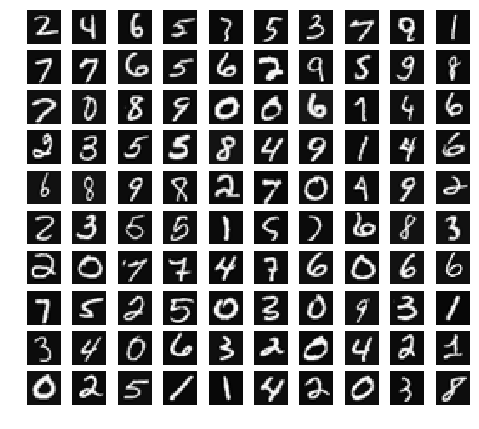

In [8]:
fig = displayData(sel)

### Part 2: Loading Parameters

#### Load the (pre-initialized) weights into variables Theta1 and Theta2

In [9]:
weights = loadmat('ex3weights.mat')
Theta1 = weights['Theta1']
Theta2 = weights['Theta2']

In [10]:
print(Theta1.shape)
print(Theta2.shape)

(25, 401)
(10, 26)


### Part 3: Implement Predict (Forward propagation)

In [11]:
# Define usual sigmoid function (neurons are sigmoid units)
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [12]:
#Forward propagation algorithm
def predict(Theta1, Theta2, X):
    m = X.shape[0]
    num_labels = Theta2.shape[0]
    
    X = np.c_[np.ones(m),X]
    
    # Forward propagate data
    # Return (m x num_labels) matrix containing for each sample, the probability that it belongs to a given class
    prob_matrix = sigmoid(np.c_[np.ones(m),sigmoid(X.dot(Theta1.T))].dot(Theta2.T))
    
    # Return m-vector, containing for each sample the class having the max probability
    return np.argmax(prob_matrix,1) + 1 # array is indexed from 0 to nbclasses -1
    

In [13]:
pred = predict(Theta1, Theta2, X)

In [15]:
print("Training set accuracy = {:2.2f} %".format(np.mean((pred.reshape(-1,1) == y).astype('int'))*100))

Training set accuracy = 97.52 %


### Visualization of predictions

<IPython.core.display.Javascript object>


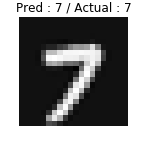

In [16]:
# Notebook backend required for animation
%matplotlib notebook

nb_examples = 10 #Number of examples to visualize
rand_indices = np.random.permutation(m)

fig = plt.figure(figsize=(2,2))
plt.ion() #Interactive mode on
fig.show()
fig.canvas.draw()

for i in range(nb_examples):
    pred_digit = pred[rand_indices[i]] if pred[rand_indices[i]]!=10 else 0 #prediction = 10 corresponds to 0
    actual_digit = np.asscalar(y[rand_indices[i],:])
    plt.clf()
    sub = fig.add_subplot(111)
    sub.axis('off')
    sub.imshow(X[rand_indices[i],:].reshape(20,20).T,cmap='gray')
    sub.set_title("Pred : {:d} / Actual : {:d}".format(pred_digit, actual_digit ))
    fig.canvas.draw()
    time.sleep(5)
    
    
# Reset to std params
plt.ioff()
%matplotlib inline

### Some wrong predictions

<IPython.core.display.Javascript object>


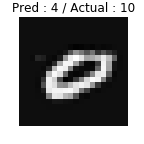

In [17]:
# Notebook backend required for animation
%matplotlib notebook

nb_examples = 10 #Number of examples to visualize
wrong_preds = np.argwhere((pred.reshape(-1,1)==y).astype('int')==0)[:,0]
rand_indices = np.random.permutation(wrong_preds)


fig = plt.figure(figsize=(2,2))
plt.ion() #Interactive mode on
fig.show()
fig.canvas.draw()

for i in range(nb_examples):
    pred_digit = pred[rand_indices[i]] if pred[rand_indices[i]]!=10 else 0 #prediction = 10 corresponds to 0
    actual_digit = np.asscalar(y[rand_indices[i],:])
    plt.clf()
    sub = fig.add_subplot(111)
    sub.axis('off')
    sub.imshow(X[rand_indices[i],:].reshape(20,20).T,cmap='gray')
    sub.set_title("Pred : {:d} / Actual : {:d}".format(pred_digit, actual_digit ))
    fig.canvas.draw()
    time.sleep(5)
    
    
# Reset to std params
plt.ioff()
%matplotlib inline

## END